
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">** Task 12: ML (Classification Algorithm II)
 🔍📊🤖 **</h1>
</div>
These exercises cover a range of classification problems, ensuring that you gain practical experience in both implementing and evaluating logistic regression and decision tree classifiers.


**Deadline: 23 July 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Tasks 🔍📊**

## 1. **Predicting Employee Attrition Using Logistic Regression** 👥

**Dataset:**  
HR Analytics Employee Attrition Dataset

**Preprocessing Steps:**  
- Handle missing values if any.
- Encode categorical variables (e.g., one-hot encoding for department, gender, etc.).
- Standardize numerical features.

**Task:**  
Implement logistic regression to predict employee attrition and evaluate the model using precision, recall, and F1-score.

---

## 2. **Classifying Credit Card Fraud Using Decision Trees** 💳

**Dataset:**  
Credit Card Fraud Detection Dataset

**Preprocessing Steps:**  
- Handle missing values if any.
- Standardize features.

**Task:**  
Implement a decision tree classifier to classify credit card transactions as fraud or not and evaluate the model using ROC-AUC and confusion matrix.

---

## 3. **Predicting Heart Disease Using Logistic Regression** ❤️

**Dataset:**  
Heart Disease Dataset

**Preprocessing Steps:**  
- Handle missing values (e.g., fill missing values with mean).
- Encode categorical variables (e.g., one-hot encoding for gender, chest pain type, etc.).
- Standardize numerical features.

**Task:**  
Implement logistic regression to predict heart disease and evaluate the model using accuracy and ROC-AUC.

---

## 4. **Classifying Emails as Spam Using Decision Trees** 📧

**Dataset:**  
Spam Email Dataset

**Preprocessing Steps:**  
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if present.

**Task:**  
Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.

---

## 5. **Predicting Customer Satisfaction Using Logistic Regression** 😊

**Dataset:**  
Customer Satisfaction Dataset

**Preprocessing Steps:**  
- Handle missing values (e.g., fill missing values with median).
- Encode categorical variables (e.g., one-hot encoding for region).
- Standardize numerical features.

**Task:**  
Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.




---

## **Let's get started!**

***Note:*** For this task, I'm intentionally minimizing exploratory data analysis (EDA) and feature engineering. I'll only perform tasks as requested to stay focused on the primary objectives without additional considerations.



## **Importing necessary libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## 1. **Predicting Employee Attrition Using Logistic Regression** 👥

### **Loading dataset**

In [ ]:
# Loading csv file
employee_attrition = pd.read_csv('/content/HREmployeeAttrition.csv')

### **Data Understanding**

In [ ]:
display('Shape of Data:',employee_attrition.shape)
display('Columns:', employee_attrition.columns)
display('Data types:',employee_attrition.dtypes)
display('Preview of data -Head:',employee_attrition.head())
display('Preview of data -Tail:',employee_attrition.tail())
display('Info:',employee_attrition.info())
display('Summary Stats:',employee_attrition.describe())
display('Missing Values:',employee_attrition.isnull().sum())
display('Duplicate Values:',employee_attrition.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(1470, 35)

'Columns:'

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

'Data types:'

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

'Preview of data -Head:'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


'Preview of data -Tail:'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

'Info:'

None

'Summary Stats:'

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


'Missing Values:'

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

'Duplicate Values:'

0

### **Preprocessing**

In [ ]:
# Requested Preprocessing Steps:

# Handle missing values if any.
# Encode categorical variables (e.g., one-hot encoding for department, gender, etc.).
# Standardize numerical features.

**Handling Missing Values**

  The dataset contains no missing values, so data imputation is not necessary.

**Encoding**

In [ ]:
         ## Feature Encoding

# Converting binary variables
employee_attrition['Over18'] = employee_attrition['Over18'].map({'Y': 1})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(employee_attrition,
                            columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
                            drop_first=True,  # Drop the first category
                            dtype='int')
# Checking the first few rows to verify encoding
display(df_encoded.head())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,1,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


**Standarization**

In [ ]:
          ## Feature Scaling

# Defining numerical features
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate', 'JobInvolvement',
                      'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
                      'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# numerical_features = df_encoded.select_dtypes(include=['int64', 'float64'])

# Ensure all numerical features are of correct type
df_encoded[numerical_features] = df_encoded[numerical_features].apply(pd.to_numeric, errors='coerce')

# Applying StandardScaler on numeric columns to scale numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Checking the first few rows to verify scaling
display(df_encoded.head())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,1,1,2,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,1,2,3,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,1,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,1,4,4,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,1.061787,1,5,4,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.868426,1,7,1,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,1,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


**Handling Imbalanced Classes**

  - ***Note:*** *High attrition rates can be costly and disruptive, while low rates might indicate a stable and satisfied workforce.*


In [ ]:
# Checking the distribution of target variable
print("\n Attrition_Yes Class Frequency:")
print(df_encoded['Attrition_Yes'].value_counts())


 Attrition_Yes Class Frequency:
Attrition_Yes
0    1233
1     237
Name: count, dtype: int64


The dataset is highly imbalanced with 1233 instances of class 0 and only 237 instances of class 1. This significant disparity can lead to biased outcomes in model predictions.This imbalance (with a much larger number of non-attrition cases compared to attrition cases) can negatively affect the performance of your predictive model, making it biased towards the majority class


**Adjusting Class Weights**
- This approach is to adjust the class weights in the model to give more importance to the minority class. Many models, like logistic regression and random forests, support this.

I am applying this approach to address the class imbalance in my task.

In [ ]:
        ## Handling Imbalanced Classes

# Adjust Class Weights: Modify class weights in your model to handle imbalance effectively.

df =df_encoded.copy()

# Separating the features and target variable
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Splitting the dataset into training and test sets
# Performing stratified split to maintain class distribution in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,  # 30% of the data for testing
                                                    random_state=42,  # For reproducibility
                                                    stratify=y)  # Ensure class distribution is preserved

# Verify the class distribution in the split datasets
print(f"Class distribution in training set:\n{y_train.value_counts() / len(y_train)}")
print(f"Class distribution in testing set:\n{y_test.value_counts() / len(y_test)}")

# Initializing the model with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

Class distribution in training set:
Attrition_Yes
0    0.838678
1    0.161322
Name: count, dtype: float64
Class distribution in testing set:
Attrition_Yes
0    0.839002
1    0.160998
Name: count, dtype: float64


### **Model Training**

In [ ]:
# Implemeningt logistic regression to predict employee attrition

# Initialization has been completed earlier

# Training model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

### **Model Evaluation**

In [ ]:
# Evaluating the model using precision, recall, and F1-score.

# Evaluation metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"Metrics for {dataset_name} data:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\n")
print_metrics(y_test, y_pred, "Test")

Metrics for Test data:
Accuracy: 0.7596371882086168
Precision: 0.3684210526315789
Recall: 0.6901408450704225
F1 Score: 0.480392156862745




## 2. **Classifying Credit Card Fraud Using Decision Trees** 💳


### **Loading dataset**

In [36]:
# Loading csv file
creditcard_fraud = pd.read_csv('/content/creditcard_fraud.csv')

### **Data Understanding**

In [37]:
display('Shape of Data:',creditcard_fraud.shape)
display('Columns:', creditcard_fraud.columns)
display('Data types:',creditcard_fraud.dtypes)
display('Preview of data -Head:',creditcard_fraud.head())
display('Preview of data -Tail:',creditcard_fraud.tail())
display('Info:',creditcard_fraud.info())
display('Summary Stats:',creditcard_fraud.describe())
display('Missing Values:',creditcard_fraud.isnull().sum())
display('Duplicate Values:',creditcard_fraud.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(130802, 31)

'Columns:'

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

'Data types:'

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

'Preview of data -Head:'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


'Preview of data -Tail:'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
130797,79434,-5.466097,2.517599,-2.343553,4.215289,-3.280618,-0.287955,-2.296688,3.464467,-2.399703,-0.060302,-2.114483,0.462967,0.038225,2.754760,0.367194,2.155235,0.816659,0.324214,-0.844215,-1.599122,0.359007,-0.339049,0.336488,0.373767,-0.522598,-0.237532,-2.033451,-0.874593,39.32,0.0
130798,79434,-0.400431,1.081795,1.398292,-0.004797,-0.018701,-0.773994,0.616732,0.061465,-0.666232,-0.343564,1.665931,0.665691,-0.022331,-0.216380,0.180755,0.520734,-0.167203,0.293220,0.121510,0.119696,-0.198177,-0.540952,0.001058,0.483626,-0.218053,0.041827,0.241530,0.090224,4.49,0.0
130799,79435,-0.061008,-0.744399,1.800945,-2.150292,-1.040646,0.448124,-0.344005,-0.007536,-2.311161,1.266455,1.088743,-0.527679,0.698368,-0.658549,0.210966,-0.319576,0.172076,0.595705,-0.260115,-0.042999,0.059198,0.617976,-0.030908,-0.313231,-0.141417,-0.142070,-0.096524,-0.202511,79.00,0.0
130800,79435,1.064540,-0.651524,0.504264,-0.180169,-0.255126,1.240949,-0.660998,0.327149,0.820702,-0.402905,0.142761,1.626029,1.477641,-0.663102,-0.791246,0.126783,-0.396479,-0.299598,0.873767,0.197927,-0.178904,-0.367111,-0.159203,-1.226536,0.230462,1.026093,-0.029286,0.004010,89.99,0.0
130801,79435,-0.743444,0.539346,2.515842,-1.960928,-0.421662,-0.724772,0.537915,-0.156173,1.292790,-1.485595,-0.422110,0.732750,0.551628,-0.694903,0.630746,-0.412972,-0.517336,0.147167,0.007807,0.139103,-0.054806,0.321604,-0.410774,0.417508,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130802 entries, 0 to 130801
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    130802 non-null  int64  
 1   V1      130802 non-null  float64
 2   V2      130802 non-null  float64
 3   V3      130802 non-null  float64
 4   V4      130802 non-null  float64
 5   V5      130802 non-null  float64
 6   V6      130802 non-null  float64
 7   V7      130802 non-null  float64
 8   V8      130802 non-null  float64
 9   V9      130802 non-null  float64
 10  V10     130802 non-null  float64
 11  V11     130802 non-null  float64
 12  V12     130802 non-null  float64
 13  V13     130802 non-null  float64
 14  V14     130802 non-null  float64
 15  V15     130802 non-null  float64
 16  V16     130802 non-null  float64
 17  V17     130802 non-null  float64
 18  V18     130802 non-null  float64
 19  V19     130802 non-null  float64
 20  V20     130802 non-null  float64
 21  V21     13

'Info:'

None

'Summary Stats:'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130801.000000,130801.000000,130801.000000,130801.000000,130801.000000,130801.000000
mean,49788.355690,-0.245796,0.001574,0.676860,0.144168,-0.285630,0.080685,-0.117838,0.062334,-0.084914,-0.019197,0.217028,0.005343,-0.016098,0.033649,0.219031,-0.007520,0.047471,-0.087828,-0.019003,0.042058,-0.037485,-0.115544,-0.034350,0.012048,0.130975,0.023770,0.000779,0.002305,92.491840,0.001995
std,20019.335232,1.823485,1.619337,1.276232,1.328394,1.314929,1.284704,1.173648,1.211108,1.094789,1.051186,1.050910,1.038320,1.007331,0.927058,0.928530,0.882774,0.895694,0.836103,0.809684,0.728446,0.721902,0.635884,0.602904,0.594216,0.438352,0.492083,0.391831,0.311492,250.808036,0.044625
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,36926.250000,-1.016281,-0.575183,0.173437,-0.714826,-0.908084,-0.659435,-0.604887,-0.132459,-0.713522,-0.489393,-0.542654,-0.397812,-0.678103,-0.343492,-0.322145,-0.477151,-0.407195,-0.554336,-0.508544,-0.169832,-0.225430,-0.544196,-0.172651,-0.323707,-0.135029,-0.325914,-0.060238,-0.004087,6.200000,0.000000
50%,51566.000000,-0.258119,0.093828,0.752911,0.170646,-0.317848,-0.173610,-0.067009,0.078867,-0.148027,-0.095500,0.131677,0.152051,-0.020485,0.062208,0.330212,0.071328,-0.016237,-0.086546,-0.020730,-0.026594,-0.058491,-0.092258,-0.045921,0.068546,0.168214,-0.066478,0.011631,0.023604,24.540000,0.000000
75%,66518.000000,1.158111,0.762659,1.367887,1.001349,0.236866,0.467422,0.409124,0.370385,0.497156,0.429909,1.035749,0.641807,0.648484,0.460584,0.889140,0.534275,0.437581,0.386236,0.477924,0.165510,0.115042,0.303347,0.082633,0.408293,0.419739,0.289216,0.086277,0.077136,82.700000,0.000000
max,79435.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


'Missing Values:'

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

'Duplicate Values:'

491

### **Preprocessing**

In [ ]:
# Preprocessing Steps:

# Handle missing values if any.
# Standardize features.

**Handling Missing Values**

Dropping missing values.


In [38]:
creditcard_fraud.dropna(inplace=True)

**Standarization**


In [39]:
# Separating features and target
X = creditcard_fraud.drop(columns=['Class'])
y = creditcard_fraud['Class']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

**Handling Imbalanced Classes**




Class Frequency:
Class
0.0    130540
1.0       261
Name: count, dtype: int64


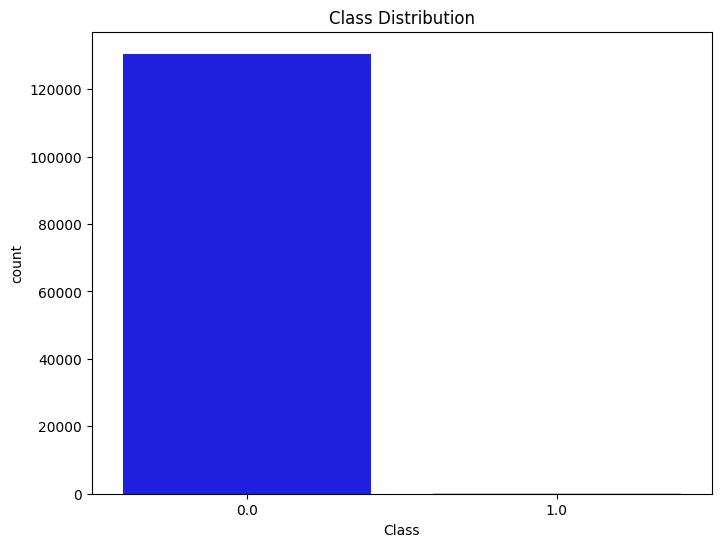

In [44]:
# Checking the distribution of target variable
print("\nClass Frequency:")
print(creditcard_fraud['Class'].value_counts())

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=creditcard_fraud, palette=['blue','yellow'])
plt.title('Class Distribution')
plt.show()

As observed, the dataset is highly imbalanced with 130540 instances of class 261 and only 492 instances of class 1. This significant disparity can lead to biased outcomes in model predictions.


***Data Resampling***

- Applying RandomUnderSampler


Class
0.0    183
1.0    183
Name: count, dtype: int64


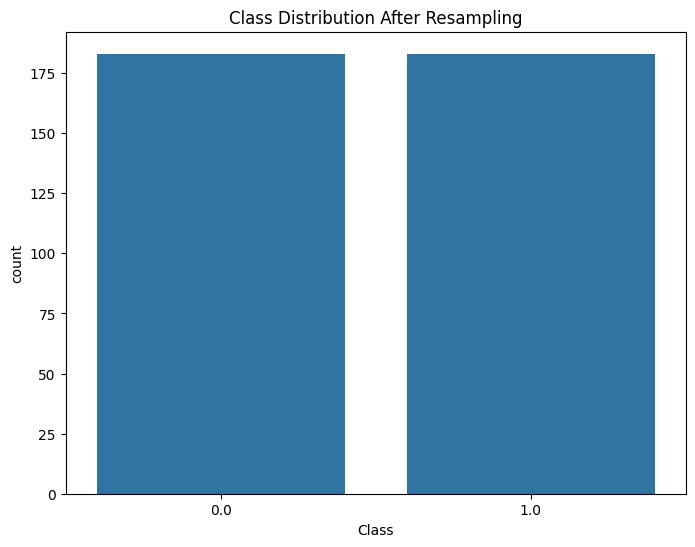

In [45]:
from imblearn.under_sampling import RandomUnderSampler

# Applying RandomUnderSampler to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Converting the resampled arrays back to DataFrames
X_rus_df = pd.DataFrame(X_train_resampled, columns=X_train_scaled.columns)
y_rus_df = pd.DataFrame(y_train_resampled, columns=['Class'])

# Combining X and y to view the complete DataFrame
rus_df = pd.concat([X_rus_df, y_rus_df], axis=1)

# Display the value counts of the resampled target variable
print(rus_df['Class'].value_counts())

# Plotting the class distribution after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=rus_df)
plt.title('Class Distribution After Resampling')
plt.show()

In [47]:
# rus_df.head()

### **Model Training**

In [48]:
# Implementing a decision tree classifier to classify credit card transactions as fraud or not

# Training a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_rus_df, y_rus_df)

DecisionTreeClassifier(random_state=42)

In [49]:
# Predictions
y_pred = decision_tree.predict(X_test_scaled)
y_pred_prob = decision_tree.predict_proba(X_test_scaled)[:, 1]

### **Model Evaluation**


ROC AUC Score: 0.8766056331296481



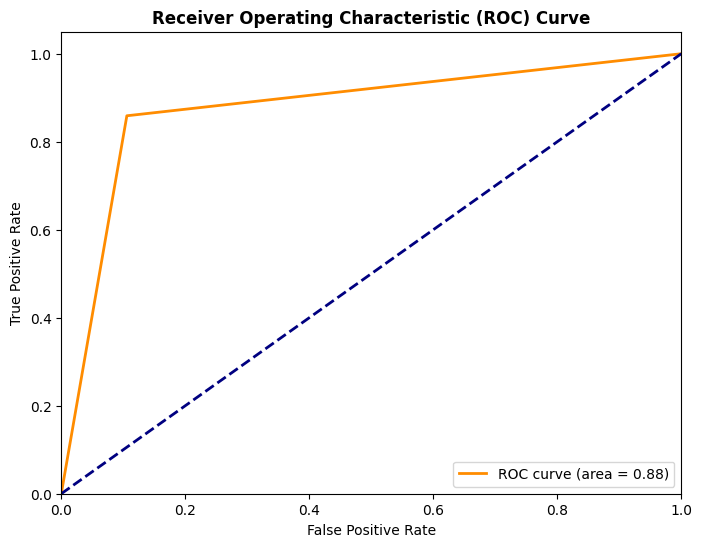

Confusion Matrix:
[[35021  4142]
 [   11    67]]


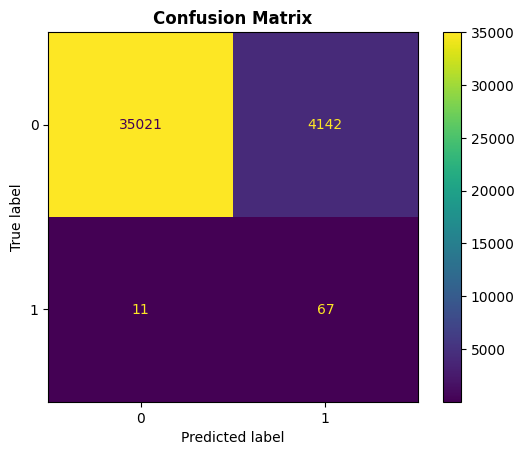

In [58]:
# Evaluating the model using ROC-AUC and confusion matrix.

# ROC-AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Calculating the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC AUC Score: {roc_auc}\n")
# Calculating the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',fontweight='bold')
plt.legend(loc="lower right")
plt.show()


# Confusion matrix
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
disp = cmd(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

## 3. **Predicting Heart Disease Using Logistic Regression ❤️**

### **Loading dataset**

In [61]:
# Loading csv file
heart_disease = pd.read_csv('/content/heart_disease_data.csv')

### **Data Understanding**

In [62]:
display('Shape of Data:',heart_disease.shape)
display('Columns:', heart_disease.columns)
display('Data types:',heart_disease.dtypes)
display('Preview of data -Head:',heart_disease.head())
display('Preview of data -Tail:',heart_disease.tail())
display('Info:',heart_disease.info())
display('Summary Stats:',heart_disease.describe())
display('Missing Values:',heart_disease.isnull().sum())
display('Duplicate Values:',heart_disease.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(303, 14)

'Columns:'

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

'Data types:'

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

'Preview of data -Head:'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


'Preview of data -Tail:'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


'Info:'

None

'Summary Stats:'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


'Missing Values:'

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

'Duplicate Values:'

1

### **Preprocessing**

In [ ]:
# Preprocessing Steps:

# Handle missing values (e.g., fill missing values with mean).
# Encode categorical variables (e.g., one-hot encoding for gender, chest pain type, etc.).
# Standardize numerical features.

**Handling Missing Values**

 The dataset contains no null values, so we can proceed to the next step.



**Encoding**

In [63]:
# List of categorical vairables
categorical_features = heart_disease.select_dtypes('object').columns
categorical_features

Index([], dtype='object')

 This Heart Disease dataset consists solely of numeric values, so there is no need for encoding.

**Standardization**

In [68]:
# Selecting the features to be scaled
features_to_scale = heart_disease[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the selected features
scaled_features = scaler.fit_transform(features_to_scale)

# Creating a DataFrame from the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Displaying the first few rows of the scaled features DataFrame
print('Scaled Features')
display(scaled_features_df.head())

# Dropping the original features that were scaled from the `heart_disease` DataFrame
heart_disease_reduced = heart_disease.drop(columns=features_to_scale.columns)

# Concatenating the scaled features with the remaining features
heart_disease_final = pd.concat([heart_disease_reduced, scaled_features_df], axis=1)

# Displaying the first few rows of the final DataFrame to verify
print('Final DataFrame with Scaled Features:')
display(heart_disease_final.head())

Scaled Features


,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


Final DataFrame with Scaled Features:


,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age,trestbps,chol,thalach,oldpeak
0,1,3,1,0,0,0,0,1,1,0.952197,0.763956,-0.256334,0.015443,1.087338
1,1,2,0,1,0,0,0,2,1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,0,1,0,0,0,2,0,2,1,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,1,1,0,1,0,2,0,2,1,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0,0,0,1,1,2,0,2,1,0.290464,-0.663867,2.082050,0.583939,-0.379244


### **Model Building**

In [70]:
# Implementing logistic regression to predict heart disease

# Separating features and target variable from the DataFrame
X = heart_disease_final.drop(columns='target')  # Features
y = heart_disease_final['target']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
lr_model = LogisticRegression()

# Training the model on the training data
lr_model.fit(X_train, y_train)

# Making predictions on the test set
Y_pred = lr_model.predict(X_test)  # Predicting class labels
Y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Predicting class probabilities for the positive class

### **Model Evaluation**

In [71]:
# Evaluating the model using accuracy and ROC-AUC.

# Accuracy
accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, Y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8524590163934426
ROC AUC Score: 0.9245689655172414


## 4. **Classifying Emails as Spam Using Decision Trees 📧**




I have completed this task, and you can review it at the following link: [Task 11 - ML Classification Algorithms I](https://github.com/mmoneka11/100DaysOfBytewise/blob/main/Week-6/Task-11_ML-Classification%20Algorithms-I/Task_11_ML_Classification_Algorithms_I.ipynb
).





## 5. **Predicting Customer Satisfaction Using Logistic Regression 😊**

I have completed this task, and you can review it at the following link: [Task 11 - ML Classification Algorithms I](https://github.com/mmoneka11/100DaysOfBytewise/blob/main/Week-6/Task-11_ML-Classification%20Algorithms-I/Task_11_ML_Classification_Algorithms_I.ipynb
).







---



---

